Intro for all models; this'll be the same for everyone; post any changes so that everyone can do it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Modelling (use your code here)

In [2]:
# set random seed
df=pd.read_excel('ModelingDataset.xlsx')
random_seed = 42

In [3]:
# separate features and target variable
X = df.drop('employee_status', axis=1)
y = df['employee_status']

# split data into train and test sets, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

# check the ratio of binary variable in train and test set
print("Ratio of binary variable in train set: ", y_train.sum() / len(y_train))
print("Ratio of binary variable in test set: ", y_test.sum() / len(y_test))


Ratio of binary variable in train set:  0.27165354330708663
Ratio of binary variable in test set:  0.2716089880268985


C:\Users\91995\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\91995\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\91995\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\91995\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

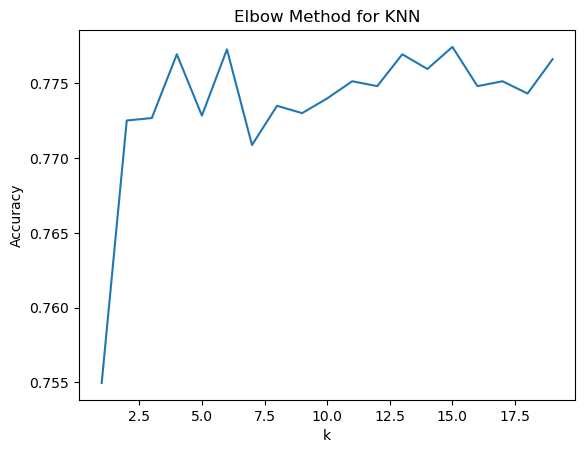

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier for different values of k
k_values = range(1, 20)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy vs. k values
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Elbow Method for KNN')
plt.show()

In [5]:
accuracies

[0.7549614564539938,
 0.7725110710185337,
 0.7726750861079219,
 0.7769394784320157,
 0.7728391011973101,
 0.7772675086107922,
 0.7708709201246514,
 0.7734951615548631,
 0.7730031162866984,
 0.7739872068230277,
 0.7751353124487453,
 0.7748072822699689,
 0.7769394784320157,
 0.7759553878956864,
 0.7774315237001804,
 0.7748072822699689,
 0.7751353124487453,
 0.7743152370018042,
 0.7766114482532392]

In [6]:
# final knn model with k=6
knn = KNeighborsClassifier(n_neighbors=6)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

C:\Users\91995\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Metrics

In [7]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# display evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print(f'Final Weighted Score for the model is {0.3*accuracy+0.2*precision+0.3*recall+0.2*specificity}')

f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("F1 score:", f1)
print("AUC score:", auc_score)

Accuracy: 0.7772675086107922
Precision: 0.6651884700665188
Recall: 0.36231884057971014
Specificity: 0.931997297905877
Confusion matrix:
[[4139  302]
 [1056  600]]
Final Weighted Score for the model is 0.6613130583516298
F1 score: 0.46911649726348714
AUC score: 0.6471580692427936


In [8]:
y_pred.sum()

902